In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Data-set from 
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [135]:
housing = pd.read_csv('Melbourne_housing_FULL.csv')
housing.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [136]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [137]:
# Cleaning
housing.dropna(subset=['Price'],inplace=True)
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Postcode,27246.0,3.113796e+03,111.139676,3000.00000,3046.0000,3088.00000,3.153000e+03,3.978000e+03
Bedroom2,20806.0,3.046237e+00,0.955122,0.00000,2.0000,3.00000,4.000000e+00,2.000000e+01
Bathroom,20800.0,1.591683e+00,0.700880,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,20423.0,1.715370e+00,0.994216,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Landsize,17982.0,5.934889e+02,3757.266429,0.00000,219.0000,512.00000,6.640000e+02,4.330140e+05
BuildingArea,10656.0,1.568346e+02,449.222791,0.00000,100.0000,133.00000,1.820000e+02,4.451500e+04
YearBuilt,12084.0,1.966609e+03,36.762373,1196.00000,1950.0000,1970.00000,2.000000e+03,2.019000e+03


In [138]:
housing.CouncilArea.isna().sum()

3

In [139]:
housing.dropna(subset=['CouncilArea'],inplace=True)

In [140]:
housing.loc[:,'Date'] = housing.Date.str.slice(-4)
housing.Date

1        2016
2        2016
4        2017
5        2017
6        2016
         ... 
34852    2018
34853    2018
34854    2018
34855    2018
34856    2018
Name: Date, Length: 27244, dtype: object

In [141]:
# set target
y = housing.Price
X = housing.drop('Price',axis=1)

In [142]:
# Recover YearBuilt by CatBoost
year_built_index_to_predict = X.YearBuilt.isna()
X_year_built_to_predict = X.loc[year_built_index_to_predict]
X_year_built_to_predict = X_year_built_to_predict.drop(columns='YearBuilt')
year_built_index = X.YearBuilt.notna()
X_year_built = X.loc[year_built_index]
X_year_built = X_year_built.drop(columns='YearBuilt')
y_year_built = X.YearBuilt.loc[year_built_index]
X_year_built.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [143]:
# Train-test-split
X_yb_train, X_yb_test, y_yb_train, y_yb_test = train_test_split(
    X_year_built, y_year_built,
    test_size=0.2,
    random_state=0
    )
[X_yb_train.shape[0], X_yb_test.shape[0]]

[9667, 2417]

In [144]:
X_yb_train.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
14151,South Kingsville,2/17 Greene St,2,u,PI,Jas,2017,9.1,3015.0,2.0,1.0,1.0,0.0,NaN,Hobsons Bay City Council,-37.8288,144.8711,Western Metropolitan,984.0
10129,Surrey Hills,20 Anderson St,3,h,S,Woodards,2016,11.2,3127.0,4.0,2.0,1.0,536.0,211.0,Boroondara City Council,-37.8309,145.0946,Southern Metropolitan,5457.0


In [145]:
categorical_columns = [
    column_name 
    for column_name in X_yb_train.columns
    if (X_yb_train[column_name].dtype in ['object'])
    ]
X_yb_train[categorical_columns]

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
14151,South Kingsville,2/17 Greene St,u,PI,Jas,2017,Hobsons Bay City Council,Western Metropolitan
10129,Surrey Hills,20 Anderson St,h,S,Woodards,2016,Boroondara City Council,Southern Metropolitan
30818,Sunbury,98 Wilsons La,h,SP,Raine,2017,Hume City Council,Western Metropolitan
2814,Canterbury,33 Myrtle Rd,h,S,Marshall,2016,Boroondara City Council,Southern Metropolitan
22070,South Melbourne,16 Mountain St,h,SP,Marshall,2017,Port Phillip City Council,Southern Metropolitan
...,...,...,...,...,...,...,...,...
12415,Brunswick East,164 Blyth St,h,S,Jellis,2017,Moreland City Council,Northern Metropolitan
8372,Reservoir,1/1 Leamington St,h,PI,Barry,2016,Darebin City Council,Northern Metropolitan
26201,Mill Park,1 Higgs Av,h,S,Millership,2017,Whittlesea City Council,Northern Metropolitan
30373,Frankston,18 Lindrum Rd,h,S,O'Brien,2017,Frankston City Council,South-Eastern Metropolitan


In [146]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import accuracy_score

catboost_model = CatBoostRegressor(    
    cat_features=categorical_columns,
    random_seed=0,
    logging_level='Silent',
    loss_function='RMSE'
)

In [147]:
catboost_model.fit(
    X_yb_train, y_yb_train,
    eval_set=(X_yb_test, y_yb_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [148]:
X_yearbuilt_predicted = catboost_model.predict(X_year_built_to_predict)

In [149]:
X.loc[year_built_index_to_predict,'YearBuilt'] = X_yearbuilt_predicted
X.loc[X.YearBuilt >= 2018,'YearBuilt'] = 2018.0
X.loc[:,'YearBuilt'] = X.loc[:,'YearBuilt'].round()
X.YearBuilt.describe()

count    27244.000000
mean      1966.037917
std         29.964324
min       1196.000000
25%       1950.000000
50%       1970.000000
75%       1987.000000
max       2018.000000
Name: YearBuilt, dtype: float64

In [150]:
X = X.loc[X.Date.astype('int') - X.YearBuilt >= 0,:]

In [151]:
X.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom          6444
Car               6821
Landsize          9260
BuildingArea     16584
YearBuilt            0
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
[X_train.shape[0],X_test.shape[0]]


ValueError: Found input variables with inconsistent numbers of samples: [27228, 27244]

In [ ]:
catboost_model_final = CatBoostRegressor(    
    cat_features=categorical_columns,
    random_seed=0,
    logging_level='Silent',
    loss_function='MAE'
)
catboost_model_final.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

<AxesSubplot:xlabel='Price'>

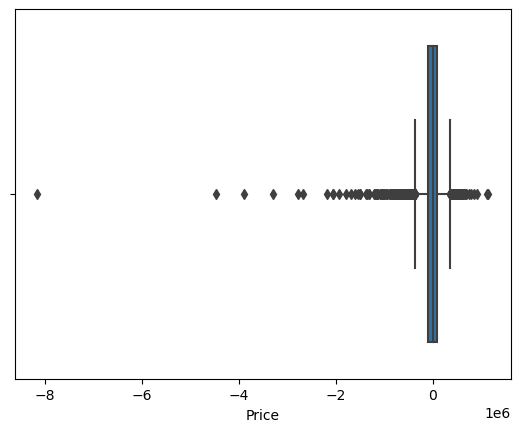

In [154]:
err = catboost_model_final.predict(X_test) - y_test

import seaborn as sns

sns.boxplot(x=err)